In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [3]:
dataFrame = pd.read_csv("alzheimer.csv")

In [4]:
dataFrame.head()

,Group,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,Nondemented,M,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,Nondemented,M,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,Demented,M,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,Demented,M,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,Demented,M,80,12,NaN,22.0,0.5,1698,0.701,1.034


In [5]:
dataFrame.describe()

,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
count,373.000000,373.000000,354.000000,371.000000,373.000000,373.000000,373.000000,373.000000
mean,77.013405,14.597855,2.460452,27.342318,0.290885,1488.128686,0.729568,1.195461
std,7.640957,2.876339,1.134005,3.683244,0.374557,176.139286,0.037135,0.138092
min,60.000000,6.000000,1.000000,4.000000,0.000000,1106.000000,0.644000,0.876000
25%,71.000000,12.000000,2.000000,27.000000,0.000000,1357.000000,0.700000,1.099000
50%,77.000000,15.000000,2.000000,29.000000,0.000000,1470.000000,0.729000,1.194000
75%,82.000000,16.000000,3.000000,30.000000,0.500000,1597.000000,0.756000,1.293000
max,98.000000,23.000000,5.000000,30.000000,2.000000,2004.000000,0.837000,1.587000


In [6]:
dataFrame.isnull().sum()

Group     0
M/F       0
Age       0
EDUC      0
SES      19
MMSE      2
CDR       0
eTIV      0
nWBV      0
ASF       0
dtype: int64

In [7]:
dataFrame["SES"].isnull().sum() / dataFrame.shape[0] *100

5.093833780160858

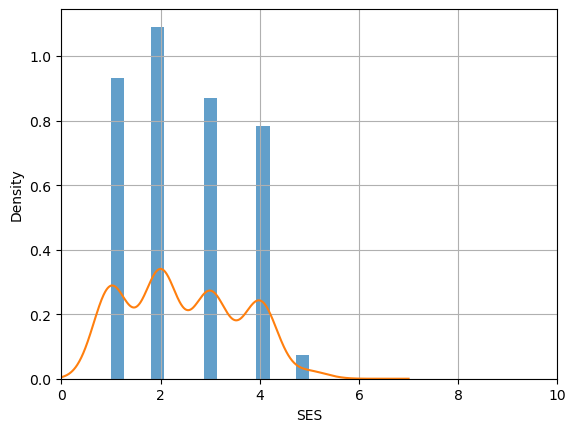

In [10]:
ax = dataFrame["SES"].hist(bins=15, density=True, stacked=True, alpha=0.7)
dataFrame["SES"].plot(kind="density")
ax.set(xlabel= "SES")
plt.xlim(0,10)
plt.grid()
plt.show() # Kısmen homojenik dağılım gösterdiği için null değerlerinin yerine ortalama değer kullanmayı tercih ettik.

In [11]:
#SES verilerinin %5 i null değer

In [12]:
dataFrame["MMSE"].isnull().sum() / dataFrame.shape[0] *100

0.5361930294906166

In [13]:
# MMSE verilerinin %0.5 i null değer

In [14]:
#kısmen homojen dağılım gösteren data set olduğu için mean değeri ile doldurulacak

In [15]:
imputer = SimpleImputer(missing_values= np.nan, strategy= "mean")

In [16]:
meanValue = dataFrame.iloc[:,4:6].values

In [17]:
imputer = imputer.fit(meanValue)

In [18]:
imputer = imputer.fit(meanValue)

In [19]:
meanValue = imputer.transform(meanValue)

In [20]:
dataFrame["SES"] = meanValue[:,0]

In [21]:
dataFrame["MMSE"] = meanValue[:,1]

In [22]:
teshis = dataFrame.iloc[:,0:1].values

In [23]:
teshis

array([['Nondemented'],
       ['Nondemented'],
       ['Demented'],
       ['Demented'],
       ['Demented'],
       ['Nondemented'],
       ['Nondemented'],
       ['Nondemented'],
       ['Nondemented'],
       ['Nondemented'],
       ['Demented'],
       ['Demented'],
       ['Demented'],
       ['Nondemented'],
       ['Nondemented'],
       ['Demented'],
       ['Demented'],
       ['Demented'],
       ['Demented'],
       ['Nondemented'],
       ['Nondemented'],
       ['Nondemented'],
       ['Nondemented'],
       ['Nondemented'],
       ['Nondemented'],
       ['Demented'],
       ['Demented'],
       ['Demented'],
       ['Demented'],
       ['Nondemented'],
       ['Nondemented'],
       ['Nondemented'],
       ['Nondemented'],
       ['Converted'],
       ['Converted'],
       ['Converted'],
       ['Converted'],
       ['Converted'],
       ['Converted'],
       ['Demented'],
       ['Demented'],
       ['Nondemented'],
       ['Nondemented'],
       ['Demented'],
       

In [24]:
le = preprocessing.LabelEncoder()

In [25]:
teshis = le.fit_transform(teshis)

/Users/yarenuyaroglu/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [26]:
teshis

array([2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 1, 1, 2, 2, 1,
       1, 1, 1, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 0, 0, 0, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 2, 1, 1,
       1, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 2, 2, 2,
       2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 2, 2, 2, 2,
       2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       1, 1, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 0, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1, 0, 0,
       0, 1, 1, 2, 2, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 1, 2, 2, 2, 0, 0, 0,
       0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 1,

In [27]:
dataFrame["Group"] = teshis

In [28]:
nondemented= dataFrame[dataFrame.Group == 2]
converted = dataFrame[dataFrame.Group == 0]
demented = dataFrame[dataFrame.Group == 1]

In [29]:
dataFrame['M/F'] = dataFrame['M/F'].replace(['F', 'M'], [0, 1])

In [30]:
dataFrame

,Group,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,2,1,87,14,2.000000,27.0,0.0,1987,0.696,0.883
1,2,1,88,14,2.000000,30.0,0.0,2004,0.681,0.876
2,1,1,75,12,2.460452,23.0,0.5,1678,0.736,1.046
3,1,1,76,12,2.460452,28.0,0.5,1738,0.713,1.010
4,1,1,80,12,2.460452,22.0,0.5,1698,0.701,1.034
...,...,...,...,...,...,...,...,...,...,...
368,1,1,82,16,1.000000,28.0,0.5,1693,0.694,1.037
369,1,1,86,16,1.000000,26.0,0.5,1688,0.675,1.040
370,2,0,61,13,2.000000,30.0,0.0,1319,0.801,1.331
371,2,0,63,13,2.000000,30.0,0.0,1327,0.796,1.323


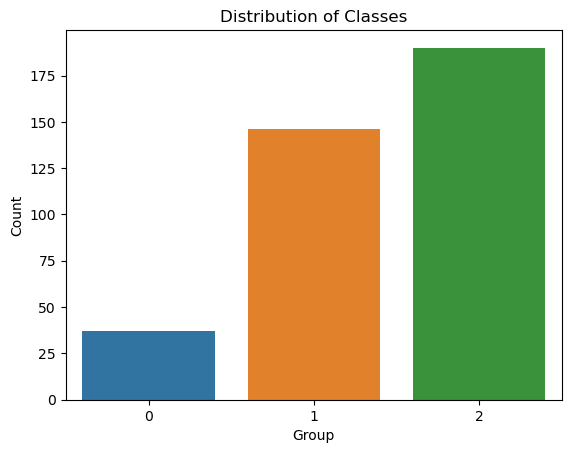

In [54]:
sbn.countplot(data=dataFrame, x='Group')
plt.title("Distribution of Classes")
plt.xlabel("Group")
plt.ylabel("Count")
plt.show()

In [55]:
dataFrame["Group"].value_counts() #hangi grupta kaç veri var

Group
2    190
1    146
0     37
Name: count, dtype: int64

In [56]:
dataFrame.columns

Index(['Group', 'M/F', 'Age', 'EDUC', 'SES', 'MMSE', 'CDR', 'eTIV', 'nWBV',
       'ASF'],
      dtype='object')

In [57]:
p = dataFrame.iloc[:,1:10].values

In [68]:
x = dataFrame[['M/F', 'Age', 'EDUC', 'SES', 'MMSE', 'CDR', 'eTIV', 'nWBV','ASF']].values

In [69]:
y= dataFrame["Group"]

In [70]:
from sklearn.preprocessing import StandardScaler

In [71]:
sc =preprocessing.StandardScaler()

In [72]:
from sklearn.model_selection import train_test_split 

In [73]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.33, random_state= 100)

In [74]:
x_train=sc.fit_transform(x_train)

In [75]:
x_test=sc.transform(x_test)

In [76]:
from sklearn.ensemble import RandomForestClassifier

In [77]:
classifier = RandomForestClassifier(random_state=0)

In [78]:
classifier.fit(x_train,y_train)

RandomForestClassifier(random_state=0)

In [79]:
y_pred = classifier.predict(x_test)

In [80]:
from sklearn.metrics import confusion_matrix

In [81]:
cm = confusion_matrix(y_test,y_pred)

In [82]:
cm

array([[ 2,  4,  0],
       [ 1, 53,  0],
       [ 0,  0, 64]])

In [85]:
# Yeni bir hasta tahmini için:
from sklearn.preprocessing import MinMaxScaler

In [86]:
sc = MinMaxScaler()

In [88]:
# F=0  M=1 nondemented=2 demented=1 converted=0

In [94]:
new_prediction = classifier.predict(sc.transform(np.array([[1,87,14,2,27,0,1987,0.696,0.883]])))


In [95]:
new_prediction[0]

1

In [97]:
new_prediction = classifier.predict(sc.transform(np.array([[1,87,14,1,30,0,1406,0.715,1.248]])))


In [98]:
new_prediction[0]

1

In [99]:
new_prediction = classifier.predict(sc.transform(np.array([[1,80,12,3,29,0,1783,0.752,0.985]])))


In [100]:
new_prediction[0]

1

In [101]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [102]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Doğruluk Oranı: {accuracy:.2f}")

r2 = r2_score(y_test, y_pred)
print(f"R^2 Skoru: {r2:.2f}")

mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.2f}")

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.2f}")

rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

Doğruluk Oranı: 0.96
R^2 Skoru: 0.88
Mean Absolute Error (MAE): 0.04
Mean Squared Error (MSE): 0.04
Root Mean Squared Error (RMSE): 0.20
